<a href="https://colab.research.google.com/github/LukeBarboza/AI-Codes/blob/HandsOn_classificacao_exercicio_2/Classificacao_exercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Imports
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

#Curva de ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Classificação Multiclasse
from sklearn.svm import SVC # Define automaticamente entre OvO (One Vs One) ou OvR(One vs All The Rest)

#caso você queira explicitamente escolher entre um dos dois

#OvR One Versus All The Rest
from sklearn.multiclass import OneVsRestClassifier

#OvO One Versus One
from sklearn.multiclass import OneVsOneClassifier

#escalonamento das entradas
from sklearn.preprocessing import StandardScaler

#Classificação Multirótulo
from sklearn.neighbors import KNeighborsClassifier

# Teste de Hiperparametros
from sklearn.model_selection import GridSearchCV

#
from scipy.ndimage import shift

In [5]:
#Returning values from sklearn
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [7]:
#Função para modificar as imagens.
def shift_mnist_image(image, direction):
    """
    Move uma imagem do MNIST (28x28) um pixel na direção especificada.
    direction: 'left', 'right', 'up', 'down'
    """
    shifts = {
        "left": (-1, 0),
        "right": (1, 0),
        "up": (0, -1),
        "down": (0, 1),
    }
    return shift(image, shift=shifts[direction], mode="constant", cval=0)

In [8]:
#Dividindo em dados para treinamento e para teste
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
#Modificando as imagens da MNIST para gerar mais dados para treinamento.
# Aplicar augmentation apenas nos dados de treinamento
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    img = X_train.iloc[i].values.reshape(28, 28)  # Converte para 28x28
    label = y_train.iloc[i]  # Rótulo correspondente

    # Adiciona a imagem original
    X_train_augmented.append(img.flatten())
    y_train_augmented.append(label)

    # Gera imagens deslocadas
    for direction in ["left", "right", "up", "down"]:
        shifted_img = shift_mnist_image(img, direction)
        X_train_augmented.append(shifted_img.flatten())
        y_train_augmented.append(label)

# Converter para arrays numpy
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [12]:
# Aqui você já tem os dados aumentados (X_train_augmented e y_train_augmented)

# Juntando os dados originais com os aumentados
X_train_final = np.concatenate([X_train, X_train_augmented], axis=0)
y_train_final = np.concatenate([y_train, y_train_augmented], axis=0)

# Agora X_train_final e y_train_final têm tanto os dados originais quanto os aumentados.

print(f"Tamanho final dos dados de treinamento: {X_train_final.shape[0]}")

Tamanho final dos dados de treinamento: 360000


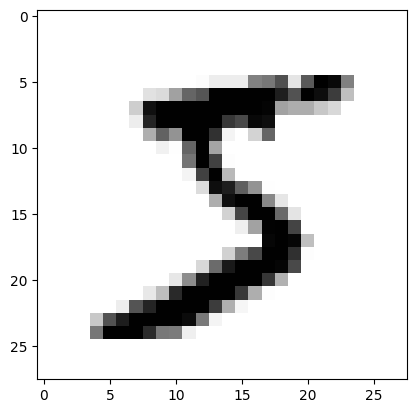

In [14]:
#Looking at one algarism in dataset
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_final, y_train_final)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn_clf.predict([some_digit])

array(['5'], dtype=object)

In [16]:
#Acurácia
accuracy1 = knn_clf.score(X_test, y_test)
accuracy1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9734